In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)


X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.20)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))


X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

Treningowe obserwacje: 10500
Testowe obserwacje: 4500
Treningowe obserwacje: 12000
Testowe obserwacje: 3000


In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


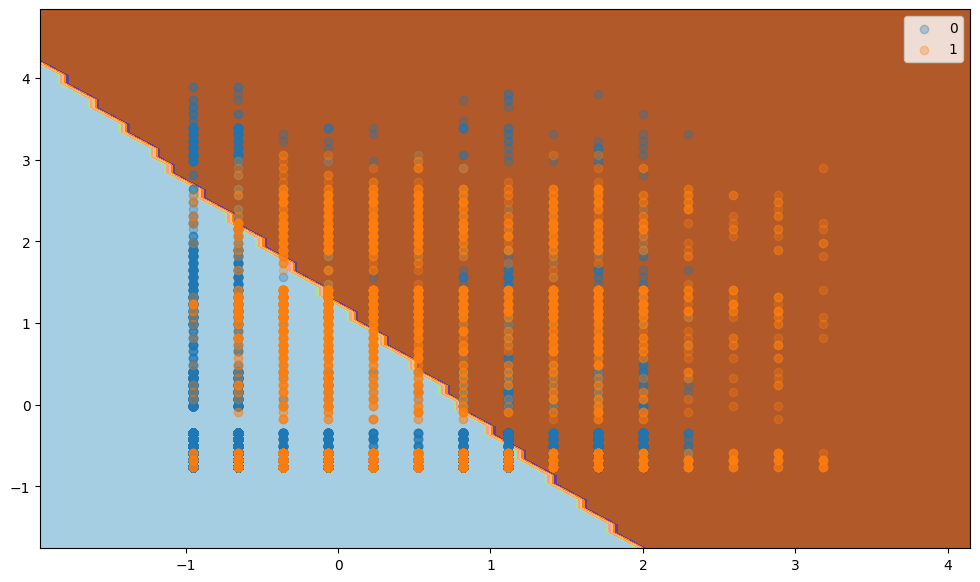

C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Regularyzacja: l1, C=0.001
F1 score (test): 0.582


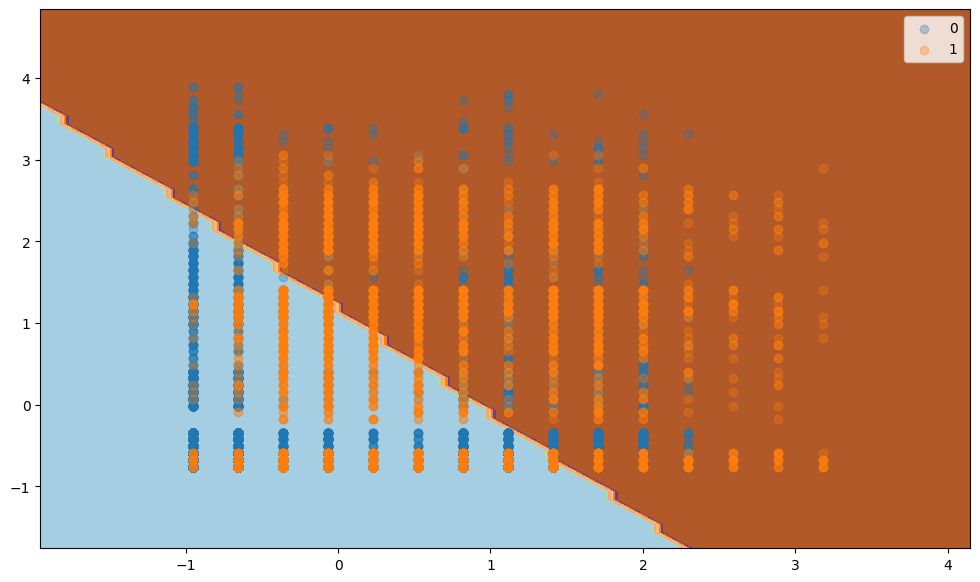

Regularyzacja: l1, C=0.01
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


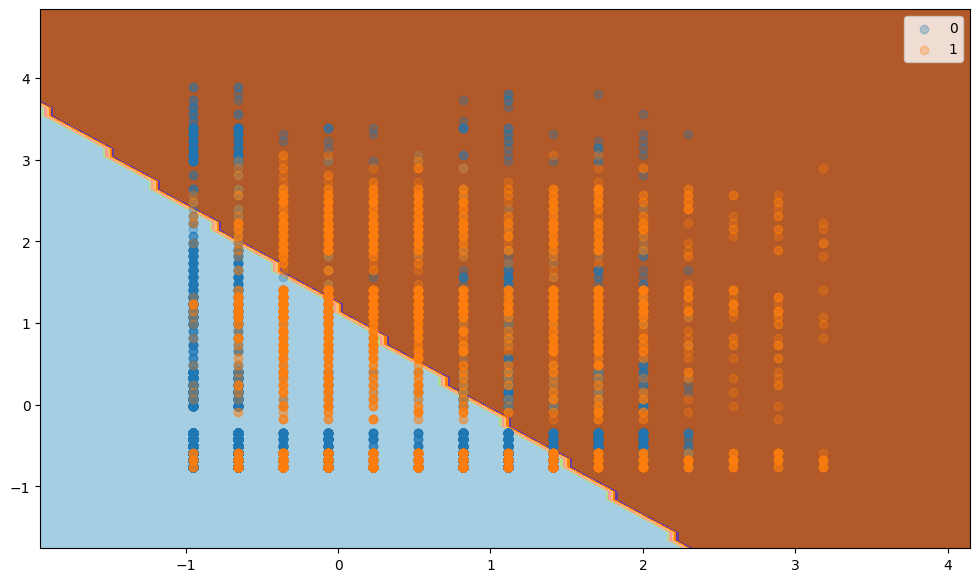

C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Regularyzacja: l1, C=0.1
F1 score (test): 0.579


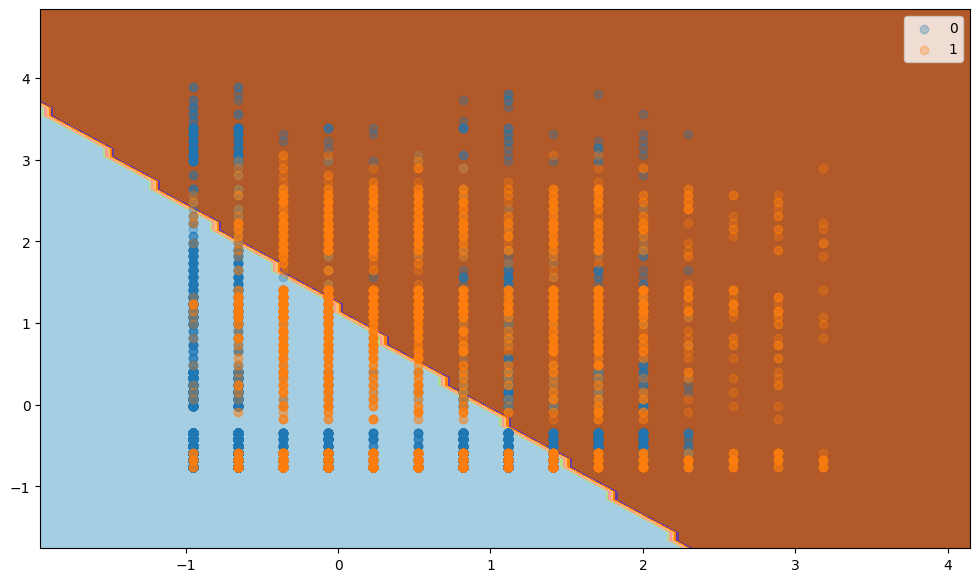

Regularyzacja: l1, C=1.0
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


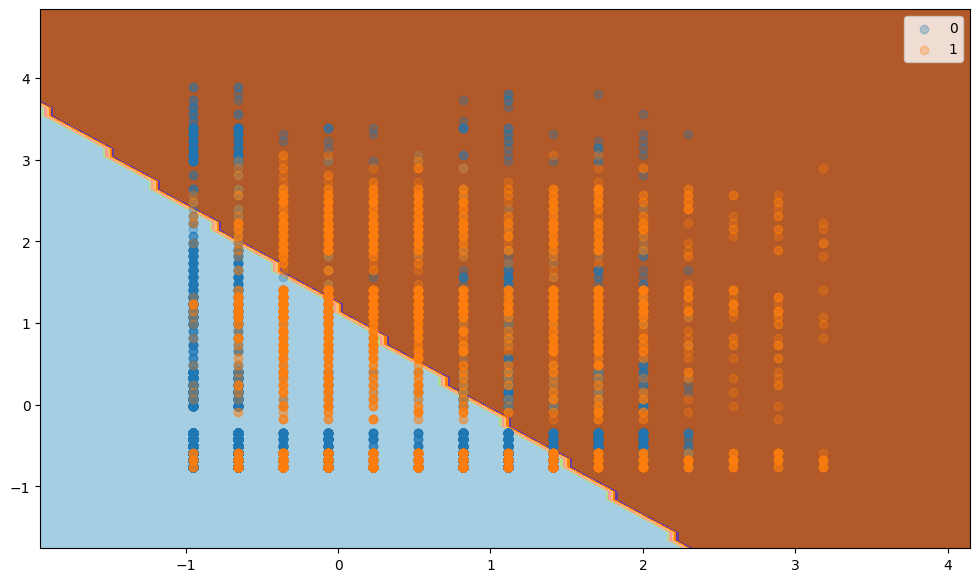

Regularyzacja: l1, C=10.0
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


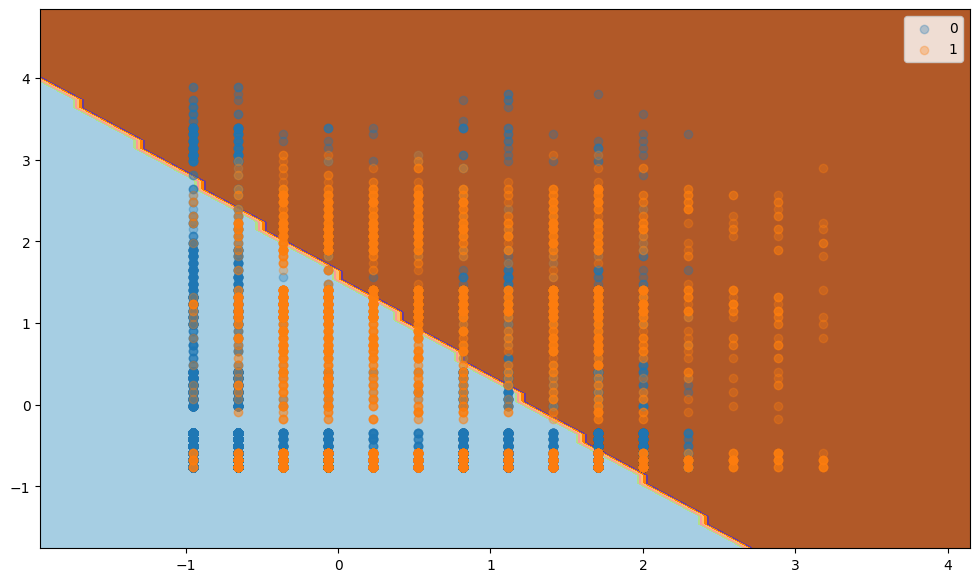

Regularyzacja: l2, C=0.001
F1 score (test): 0.505


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


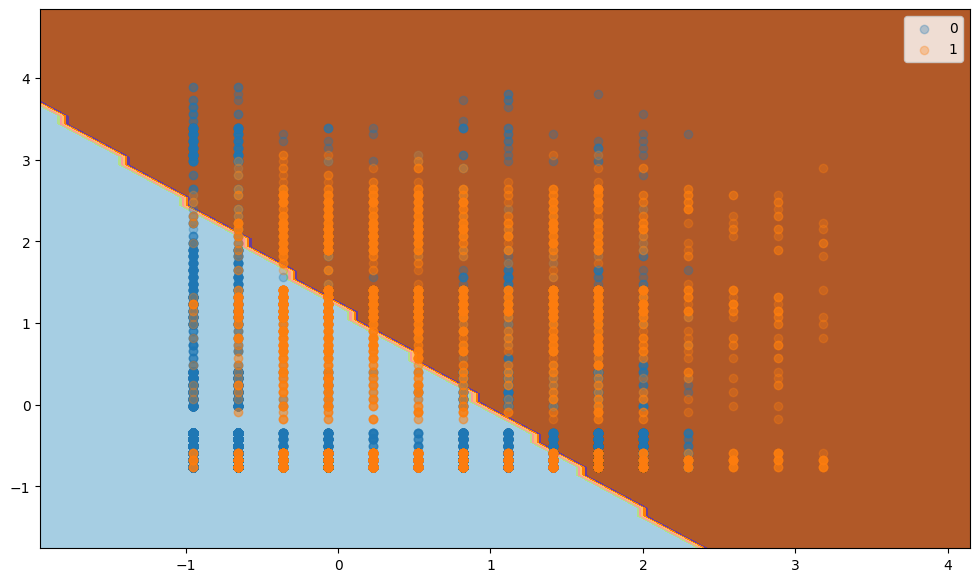

Regularyzacja: l2, C=0.01
F1 score (test): 0.575


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


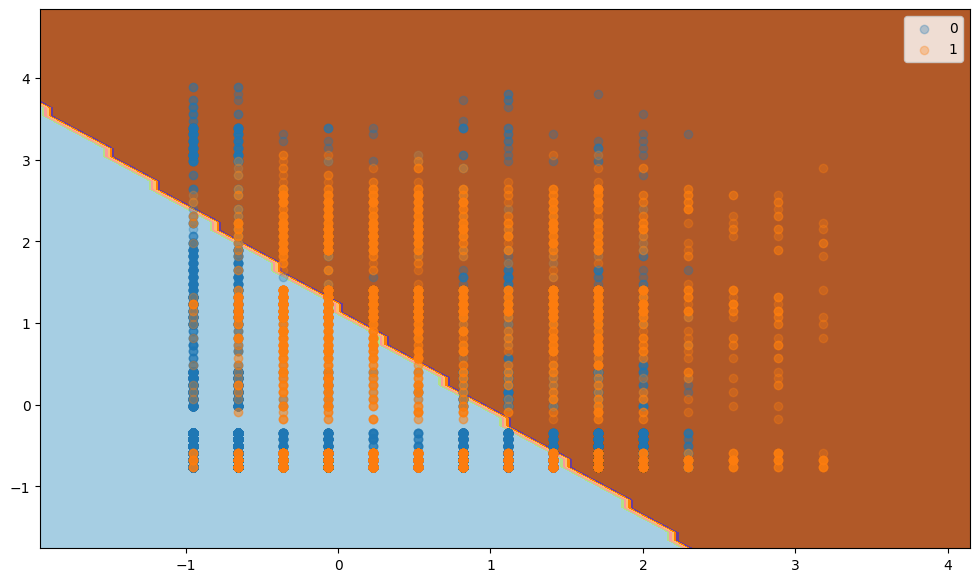

Regularyzacja: l2, C=0.1
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


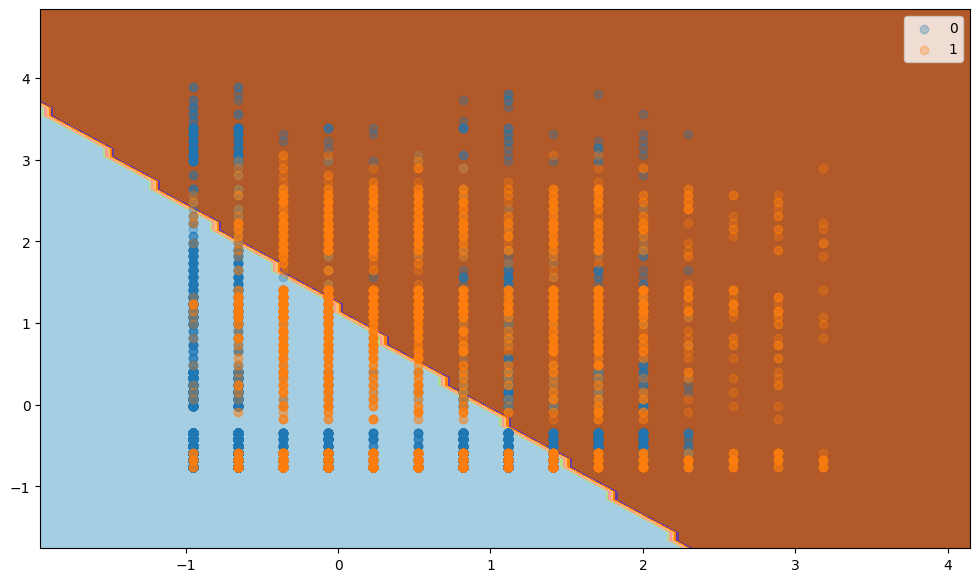

Regularyzacja: l2, C=1.0
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


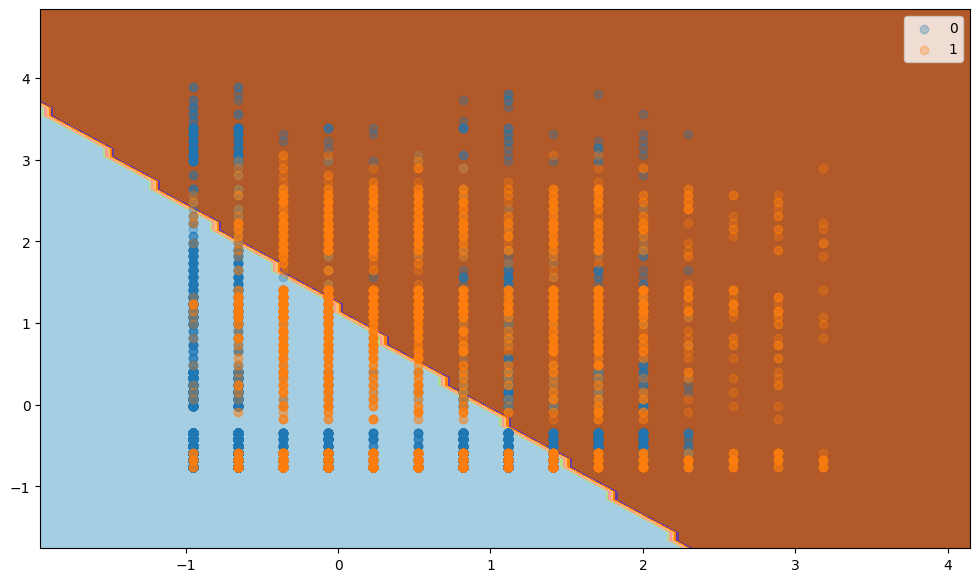

Regularyzacja: l2, C=10.0
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


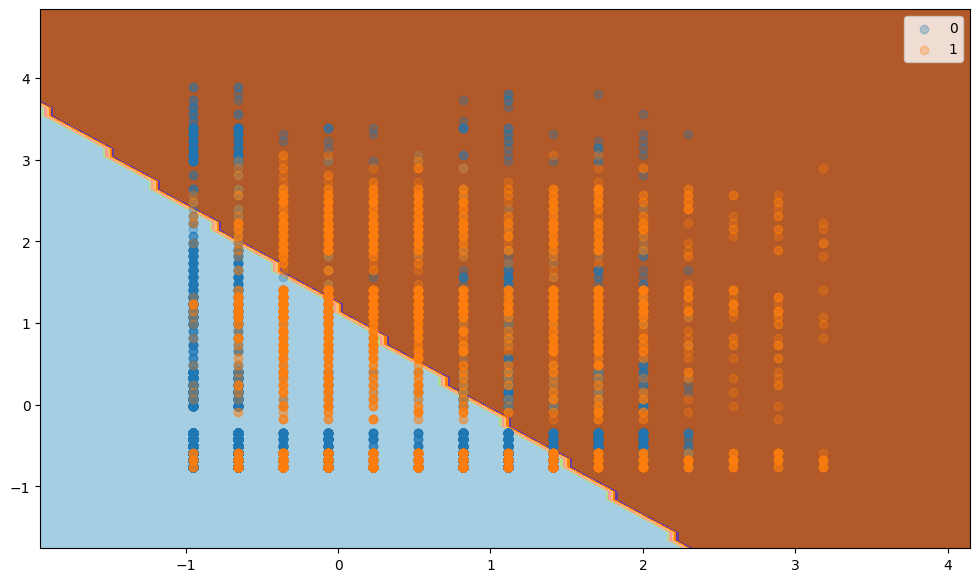

Regularyzacja: None, C=10.0
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


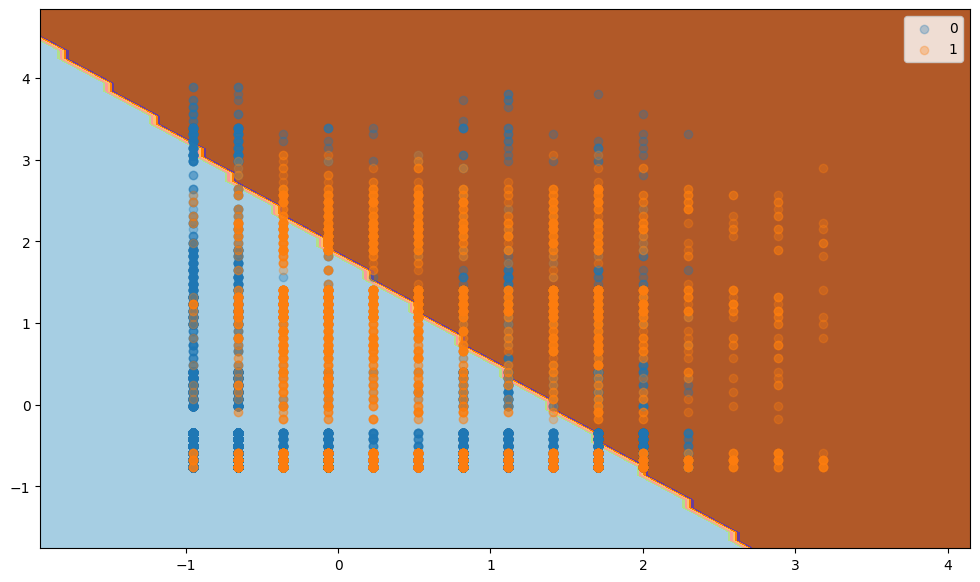

Regularyzacja: elasticnet, C=0.001
F1 score (test): 0.477


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


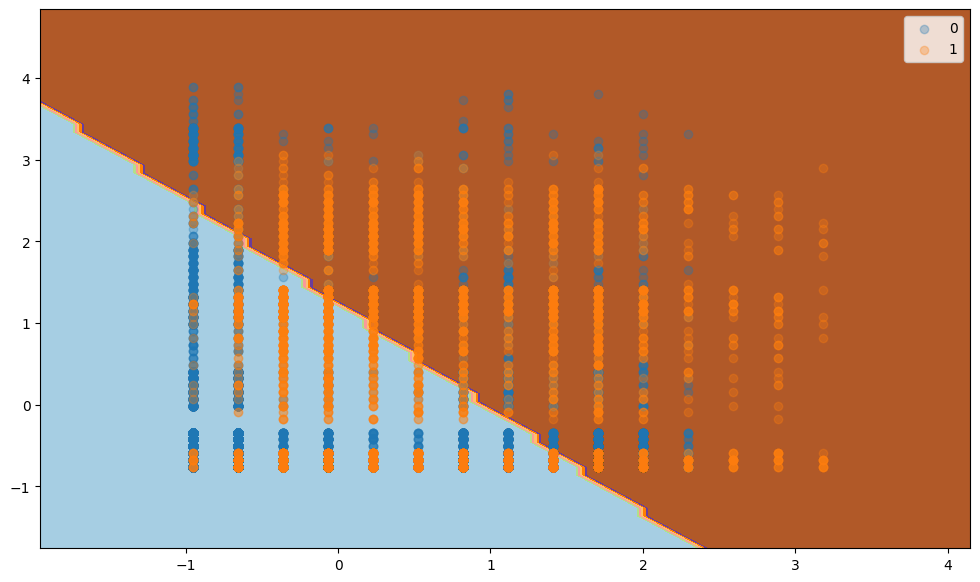

Regularyzacja: elasticnet, C=0.01
F1 score (test): 0.569


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


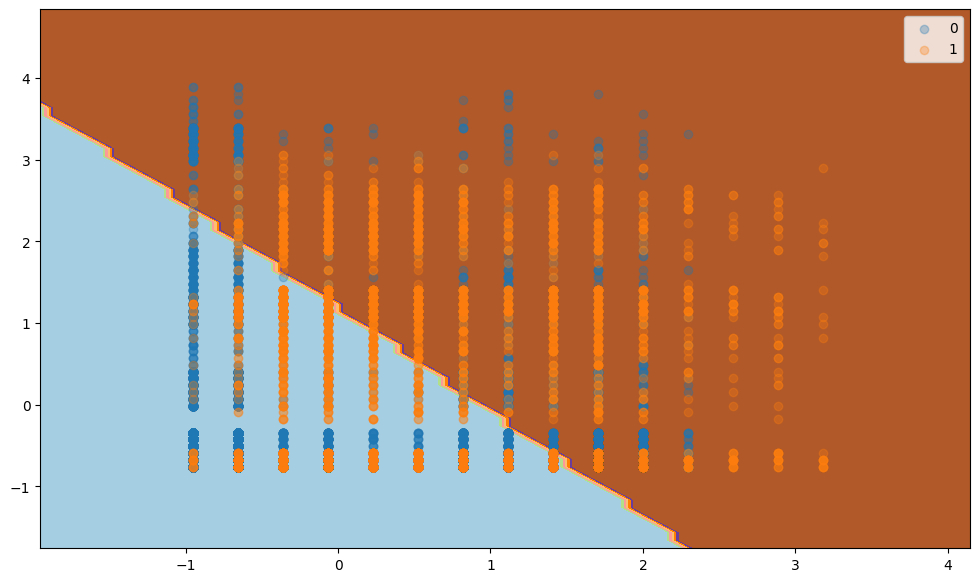

Regularyzacja: elasticnet, C=0.1
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


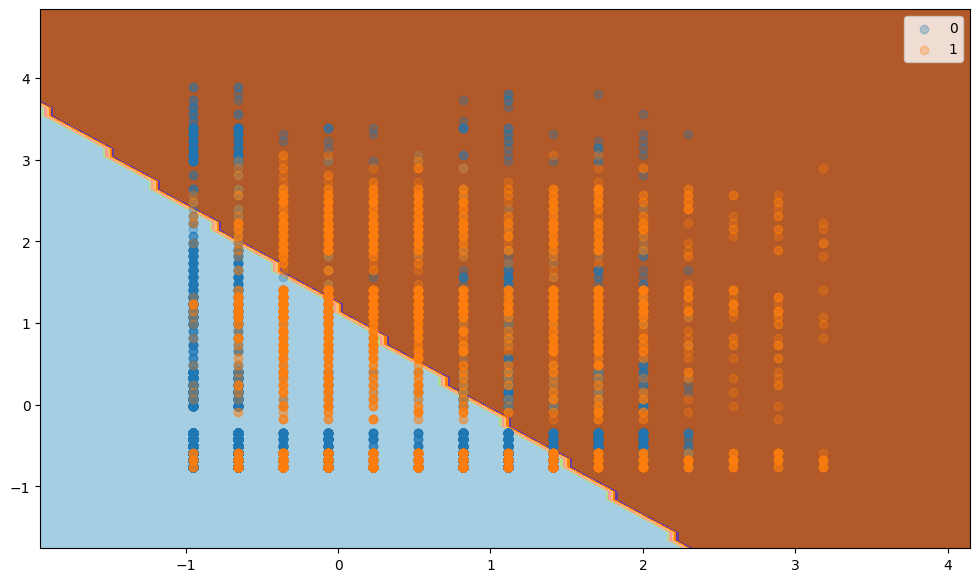

Regularyzacja: elasticnet, C=1.0
F1 score (test): 0.579


C:\Users\wista\AppData\Local\Temp\ipykernel_25684\1749715056.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


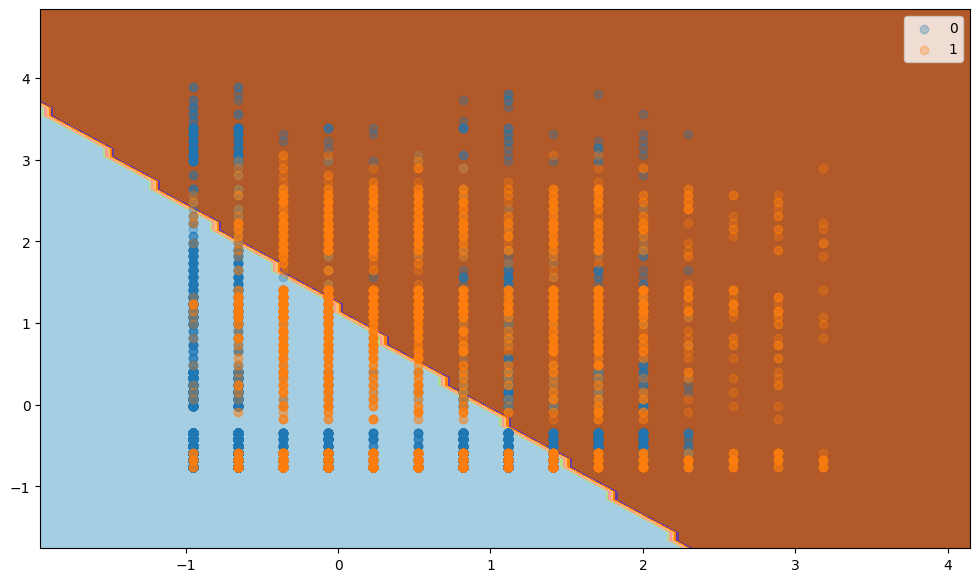

Regularyzacja: elasticnet, C=10.0
F1 score (test): 0.579


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np 

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
# model_lr = LogisticRegression(penalty=None, solver='lbfgs')
# model_lr.fit(X_train_standardized, y_train)

# Lista parametrów do przetestowania
penalties = ['l1', 'l2', None, 'elasticnet']
C_values = [0.001, 0.01, 0.1, 1.0, 10.0]  # Dodajemy różne siły regularyzacji

results = []

for penalty in penalties:
    if penalty == 'l1':
        for C in C_values:
            model = LogisticRegression(penalty=penalty, solver='liblinear', C=C)
            model.fit(X_train_standardized, y_train)
            predictions = model.predict(X_test_standardized)
            plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)
            print(f'Regularyzacja: {penalty}, C={C}')
            print(f'F1 score (test): {f1_score(y_test, predictions):.3f}')
            results.append({'penalty': penalty, 'C': C, 'f1_score': f1_score(y_test, predictions)})
        pass
    elif penalty == 'l2':
        for C in C_values:
            model = LogisticRegression(penalty=penalty, solver='lbfgs', C=C)
            model.fit(X_train_standardized, y_train)
            predictions = model.predict(X_test_standardized)
            plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)
            print(f'Regularyzacja: {penalty}, C={C}')
            print(f'F1 score (test): {f1_score(y_test, predictions):.3f}')
            results.append({'penalty': penalty, 'C': C, 'f1_score': f1_score(y_test, predictions)})
        pass
    elif penalty == 'elasticnet':
        for C in C_values:
            model = LogisticRegression(penalty=penalty, solver='saga', C=C, l1_ratio=0.5)
            model.fit(X_train_standardized, y_train)
            predictions = model.predict(X_test_standardized)
            plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)
            print(f'Regularyzacja: {penalty}, C={C}')
            print(f'F1 score (test): {f1_score(y_test, predictions):.3f}')
            results.append({'penalty': penalty, 'C': C, 'f1_score': f1_score(y_test, predictions)})
        pass
    elif penalty is None:
        model = LogisticRegression(penalty=penalty, solver='lbfgs')
        model.fit(X_train_standardized, y_train)
        predictions = model.predict(X_test_standardized)
        plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model)
        print(f'Regularyzacja: {penalty}, C={C}')
        print(f'F1 score (test): {f1_score(y_test, predictions):.3f}')
        results.append({'penalty': penalty, 'C': C, 'f1_score': f1_score(y_test, predictions)})
        pass

In [4]:
results_df = pd.DataFrame(results)
print(results_df.round(3))

       penalty       C  f1_score
0           l1   0.001     0.582
1           l1   0.010     0.579
2           l1   0.100     0.579
3           l1   1.000     0.579
4           l1  10.000     0.579
5           l2   0.001     0.505
6           l2   0.010     0.575
7           l2   0.100     0.579
8           l2   1.000     0.579
9           l2  10.000     0.579
10        None  10.000     0.579
11  elasticnet   0.001     0.477
12  elasticnet   0.010     0.569
13  elasticnet   0.100     0.579
14  elasticnet   1.000     0.579
15  elasticnet  10.000     0.579


Najlepiej sprawdziła się regulacja l1 z bardzo niskim stopniem, natomiast najgorzej regulacja l2 też z bardzo małym stopniem